In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import plot_utils
import os

In [2]:
train_label = pd.read_csv("./data/train_label.csv")
val_label = pd.read_csv("./data/val_label.csv")

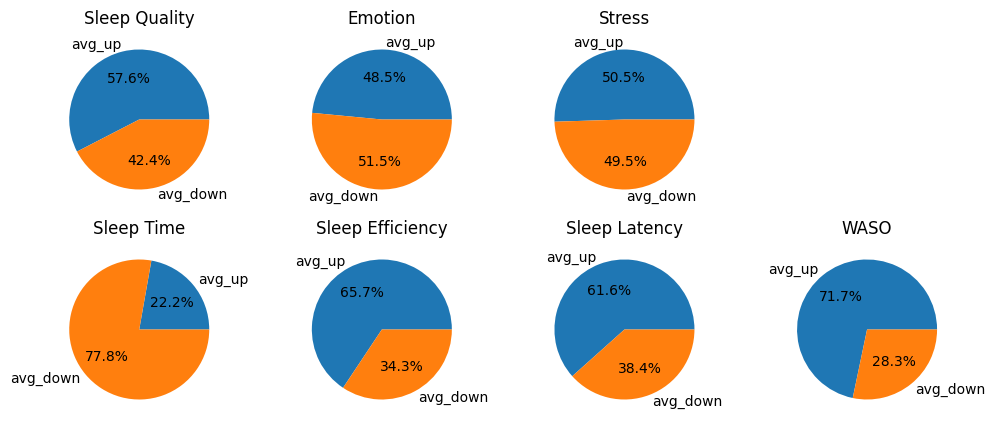

In [3]:
plot_utils.plot_label_dist(train_label)

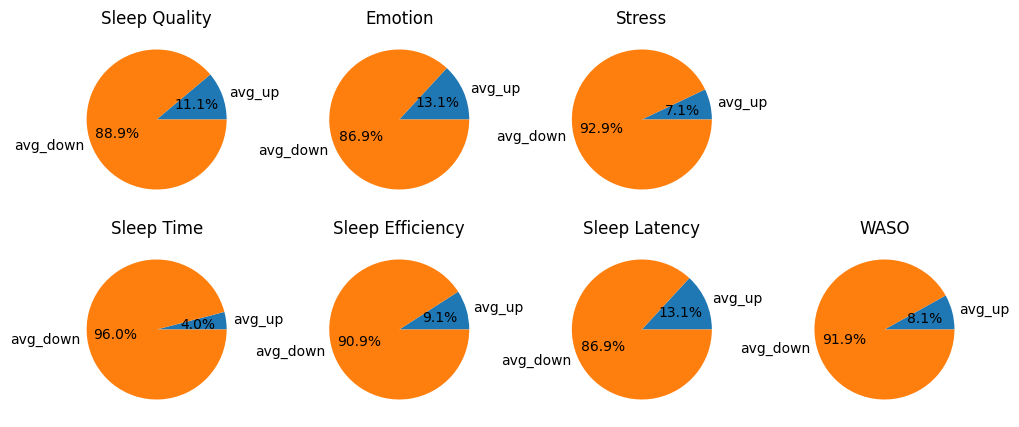

In [4]:
plot_utils.plot_label_dist(val_label)

In [91]:
def plot_HAR_m(path, t_start = 0, t_end = 0):
    fig = plt.figure(figsize = (15, 21))
    measure = ['mAcc', 'mGps', 'mGyr', 'mMag']
    feature_map = {'mAcc' : ['timestamp','x','y','z'], 'mGps' : ['timestamp', 'lat', 'lon', 'accuracy'], 
                   'mGyr' : ['timestamp', 'x', 'y', 'z', 'roll', 'pitch', 'yaw'], 'mMag' : ['timestamp','x','y','z']}
    color_map = ['r', 'g', 'b', 'purple', 'pink', 'grey']
    activity_color = {'work' : 'red', 'study' : 'red', 'travel' : 'yellow', 'meal' : 'green', 'recreation_etc' : 'blue', 'recreation_media' : 'blue',
                      'outdoor_act' : 'purple', 'household' : 'grey', 'personal_care' : 'pink', 'sleep' : 'black', 'socialising' : 'blue'}
    pos = [611, 612, 613, 614, 615, 616]
    for i in range(4):
        directory = path + measure[i]+'/'
        files = os.listdir(directory)
        files = [file for file in files if "csv" in file]
        files.sort()
        # init_date = pd.to_datetime(int(directory.split("/")[3]), unit = 's')
        df = pd.read_csv(directory+files[0])
        
        for filename in files[1:]:
            filepath = os.path.join(directory, filename)
            if os.path.isfile(filepath):
                date = pd.to_datetime(int(filename.split(".")[0]), unit='s') + datetime.timedelta(hours = 9)
                temp_df = pd.read_csv(directory+filename)
                temp_df['timestamp'] = temp_df['timestamp'].apply(lambda x : date + datetime.timedelta(seconds = x) if True else x)
                df['timestamp'] = pd.to_datetime(df['timestamp'])
                df = pd.concat([df, temp_df])
        df = df[df['timestamp'] >= datetime.datetime(2000, 1, 1, 12, 0, 0)]
        if (t_start != 0 and t_end != 0):
            df = df[df['timestamp'] >= t_start*60]
            df = df[df['timestamp'] <= t_end*60]
        
        ax = fig.add_subplot(pos[i])
        for j, feature in enumerate(feature_map[measure[i]][1:]):
            ax.scatter(df['timestamp'], df[feature], s = 2, marker = '_', alpha = 0.5, color = color_map[j], label = feature)
        ax.set_title(measure[i])
        ax.legend(loc="best")

    ax = fig.add_subplot(pos[-2])
    label_path = path + path.split("/")[3] + "_label.csv"
    df = pd.read_csv(label_path)
    df["ts"] = pd.to_datetime(df["ts"], unit = 's') + datetime.timedelta(hours = 9)
    used_labels = set()
    df = df[df['ts'] >= datetime.datetime(2000, 1, 1, 12, 0, 0)]
    if (t_start != 0 and t_end != 0):
        df = df[df['ts'] >= t_start]
        df = df[df['ts'] <= t_end]
    for i in range(1, len(df)):
        ax.fill_between([df.iloc[i-1, 0], df.iloc[i, 0]], 0, 1, color=activity_color[df.iloc[i-1, 1]], label=df.iloc[i-1, 1] if df.iloc[i-1, 1] not in used_labels else "")
        used_labels.add(df.iloc[i-1,1])
    ax.set_title('action')
    ax.legend(loc="best")

    ax = fig.add_subplot(pos[-1])
    ax.plot(df['ts'], df['emotionPositive'], label = 'emotionPositive')
    ax.plot(df['ts'], df['emotionTension'], label = 'emotionTension')
    ax.plot(df['ts'], df['activity'], label = 'activity')
    ax.set_title('survey')
    ax.legend(loc="best")
    
    plt.show()

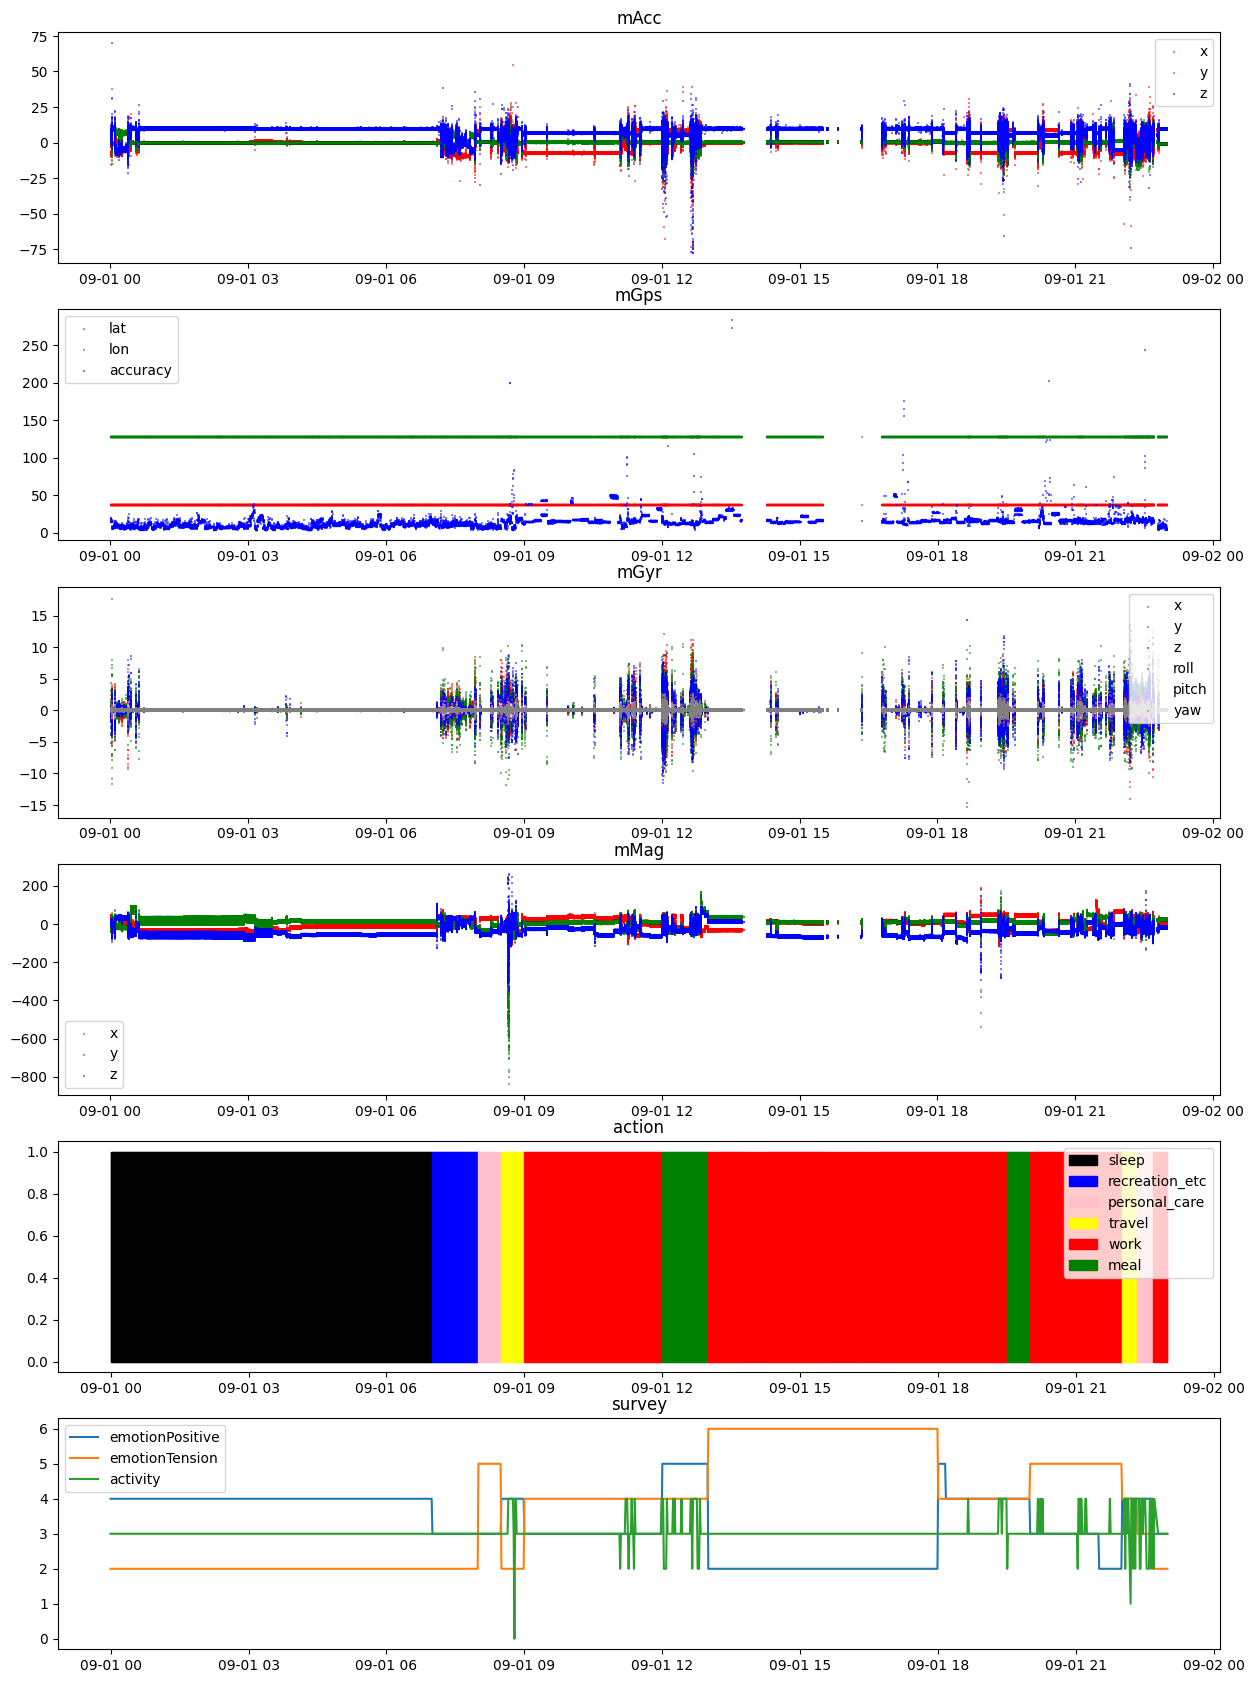

In [92]:
data_path = 'data/user01-06/user02/1598886000/'
plot_HAR_m(data_path)

In [87]:
def plot_HAR_w(path, t_start = 0, t_end = 0):
    fig = plt.figure(figsize = (15, 17))
    measure = ['e4Acc', 'e4Bvp', 'e4Eda', 'e4Hr', 'e4Temp']
    feature_map = {'e4Acc' : ['timestamp','x','y','z'], 'e4Bvp' : ['timestamp','value'], 
                   'e4Eda' : ['timestamp','eda'], 'e4Hr' : ['timestamp','hr'], 'e4Temp' : ['timestamp','temp']}
    color_map = ['r', 'g', 'b', 'purple']
    pos = [511, 512, 513, 514, 515]
    for i in range(5):
        directory = path + measure[i]+'/'
        files = os.listdir(directory)
        files = [file for file in files if "csv" in file]
        files.sort()
        # init_date = pd.to_datetime(int(directory.split("/")[3]), unit = 's')
        df = pd.read_csv(directory+files[0])
        
        for filename in files[1:]:
            filepath = os.path.join(directory, filename)
            if os.path.isfile(filepath):
                date = pd.to_datetime(int(filename.split(".")[0]), unit='s') + datetime.timedelta(hours = 9)
                temp_df = pd.read_csv(directory+filename)
                temp_df['timestamp'] = temp_df['timestamp'].apply(lambda x : date + datetime.timedelta(seconds = x) if True else x)
                df['timestamp'] = pd.to_datetime(df['timestamp'])
                df = pd.concat([df, temp_df])
        df = df[df['timestamp'] >= datetime.datetime(2000, 1, 1, 12, 0, 0)]
        if (t_start != 0 and t_end != 0):
            df = df[df['timestamp'] >= t_start*60]
            df = df[df['timestamp'] <= t_end*60]
        
        ax = fig.add_subplot(pos[i])
        for j, feature in enumerate(feature_map[measure[i]][1:]):
            ax.scatter(df['timestamp'], df[feature], s = 2, marker = '_', alpha = 0.5, color = color_map[j], label = feature)
        ax.set_title(measure[i])
        ax.legend(loc="best")

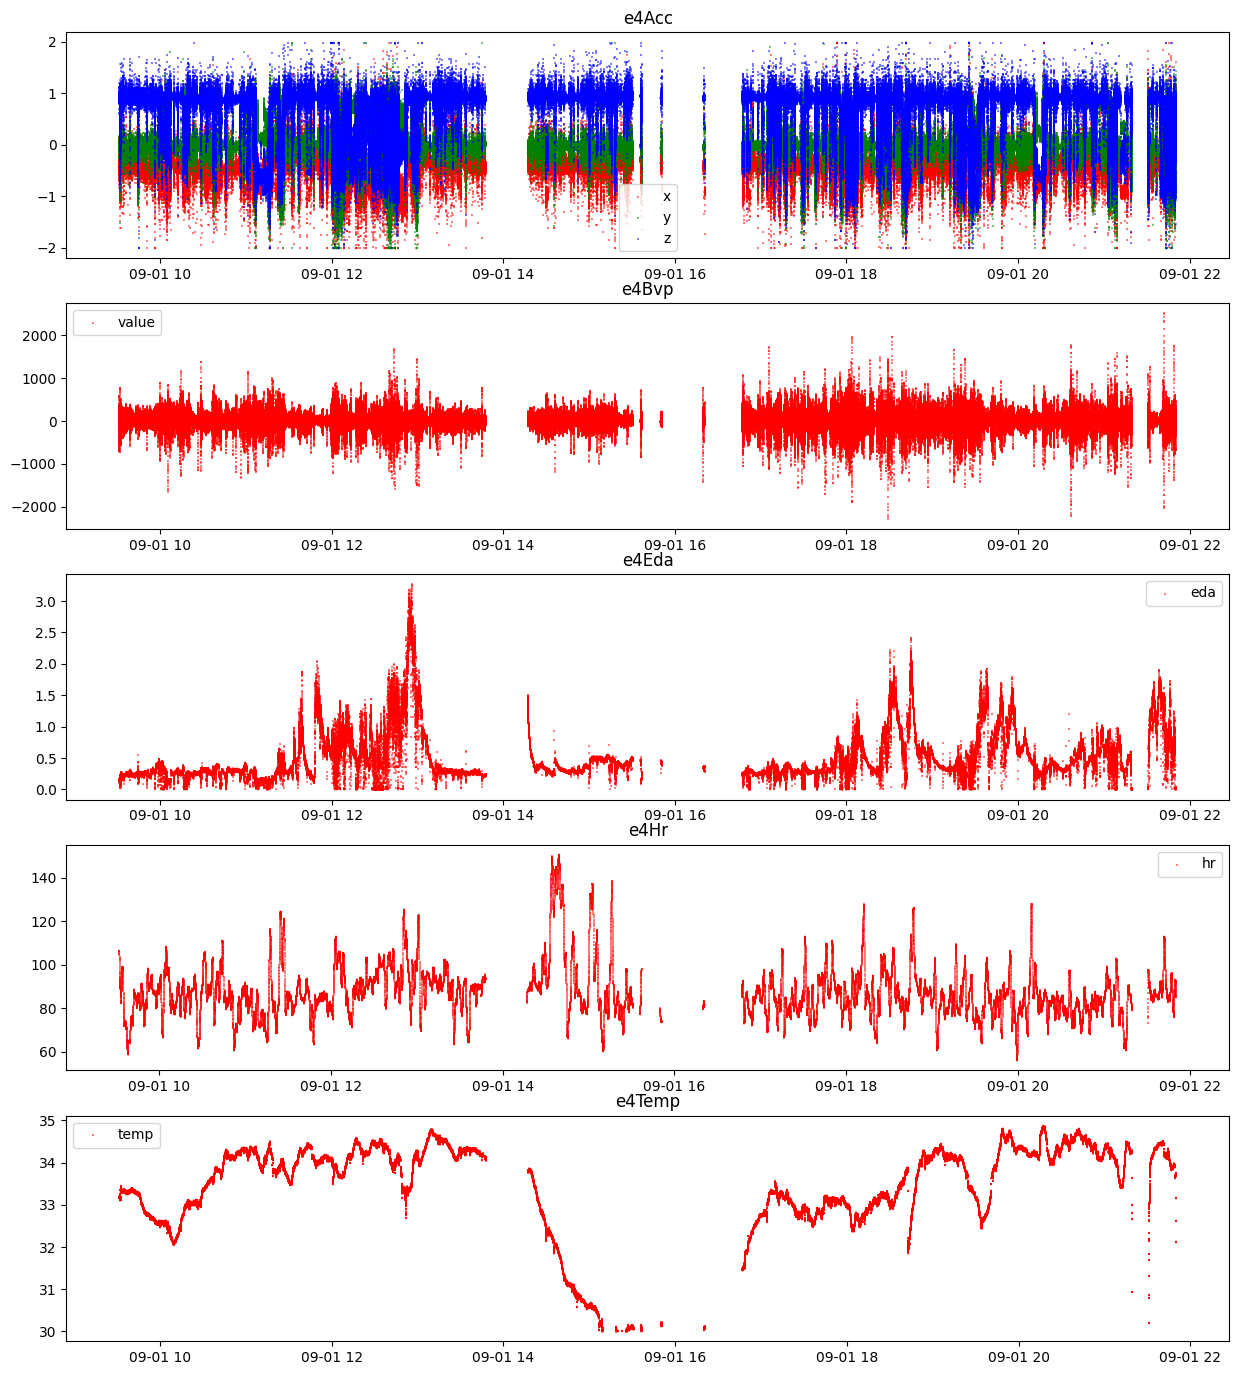

In [88]:
data_path = 'data/user01-06/user02/1598886000/'
plot_HAR_w(data_path)

In [83]:
data_path = 'data/user01-06/user02/1598886000/'
df = pd.read_csv(data_path+'e4Acc/1598920260.csv')
init_date = pd.to_datetime(int((data_path+'e4Acc/1598920200.csv').split("/")[5].split(".")[0]), unit = 's') + datetime.timedelta(hours = 9)
df['timestamp'] = df['timestamp'].apply(lambda x : init_date + datetime.timedelta(seconds = x) if True else x)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df

,timestamp,x,y,z
0,2020-09-01 09:30:32.000,-0.515625,-0.015625,0.859375
1,2020-09-01 09:30:32.031,-0.484375,-0.015625,0.859375
2,2020-09-01 09:30:32.062,-0.546875,-0.015625,0.843750
3,2020-09-01 09:30:32.093,-0.546875,-0.015625,0.843750
4,2020-09-01 09:30:32.125,-0.515625,-0.031250,0.843750
...,...,...,...,...
891,2020-09-01 09:30:59.843,-0.421875,-0.062500,0.890625
892,2020-09-01 09:30:59.875,-0.421875,-0.062500,0.890625
893,2020-09-01 09:30:59.906,-0.421875,-0.062500,0.906250
894,2020-09-01 09:30:59.937,-0.421875,-0.062500,0.906250


In [11]:
activity = './data/test_dataset/ch2024_test_m_activity.parquet.gzip'
ambience = './data/test_dataset/ch2024_test_m_ambience.parquet.gzip'
heart_rate = './data/test_dataset/ch2024_test_w_heart_rate.parquet.gzip'
w_light = './data/test_dataset/ch2024_test_w_light.parquet.gzip'
light = './data/test_dataset/ch2024_test_m_light.parquet.gzip'
pedo = './data/test_dataset/ch2024_test_w_pedo.parquet.gzip'
usage_stats = './data/test_dataset/ch2024_test_m_usage_stats.parquet.gzip'
gps = './data/test_dataset/ch2024_test_m_gps.parquet.gzip'
acc_5 = './data/test_dataset/ch2024_test__m_acc_part_5.parquet.gzip'
acc_6 = './data/test_dataset/ch2024_test__m_acc_part_6.parquet.gzip'
acc_7 = './data/test_dataset/ch2024_test__m_acc_part_7.parquet.gzip'
acc_8 = './data/test_dataset/ch2024_test__m_acc_part_8.parquet.gzip'

test_df = pd.read_parquet(acc_6)
test_df #.loc[0, 'ambience_labels']

,subject_id,timestamp,x,y,z
0,6,2023-10-06 00:00:00.020,0.069392,0.040678,9.822537
1,6,2023-10-06 00:00:00.039,0.066999,0.031107,9.815358
2,6,2023-10-06 00:00:00.060,0.057428,0.047856,9.815358
3,6,2023-10-06 00:00:00.077,0.043071,0.045464,9.812965
4,6,2023-10-06 00:00:00.096,0.052642,0.033500,9.829716
...,...,...,...,...,...
4374317,6,2023-11-07 23:59:59.919,0.076570,0.021535,9.822537
4374318,6,2023-11-07 23:59:59.936,0.069392,0.028714,9.796216
4374319,6,2023-11-07 23:59:59.955,0.088534,0.009571,9.822537
4374320,6,2023-11-07 23:59:59.974,0.090927,0.031107,9.820144


In [94]:
activity = './data/val_dataset/ch2024_val__m_activity.parquet.gzip'
ambience = './data/val_dataset/ch2024_val__m_ambience.parquet.gzip'
heart_rate = './data/val_dataset/ch2024_val__w_heart_rate.parquet.gzip'
w_light = './data/val_dataset/ch2024_val__w_light.parquet.gzip'
light = './data/val_dataset/ch2024_val__m_light.parquet.gzip'
pedo = './data/val_dataset/ch2024_val__w_pedo.parquet.gzip'
usage_stats = './data/val_dataset/ch2024_val__m_usage_stats.parquet.gzip'
gps = './data/val_dataset/ch2024_val__m_gps.parquet.gzip'
acc_1 = './data/val_dataset/ch2024_val__m_acc_part_1.parquet.gzip'
acc_2 = './data/val_dataset/ch2024_val__m_acc_part_2.parquet.gzip'
acc_3 = './data/val_dataset/ch2024_val__m_acc_part_3.parquet.gzip'
acc_4 = './data/val_dataset/ch2024_val__m_acc_part_4.parquet.gzip'

test_df = pd.read_parquet(acc_1)
test_df #.loc[0, 'ambience_labels']

,subject_id,timestamp,x,y,z
0,1,2023-08-20 00:00:00.025,0.933201,-3.522235,9.164511
1,1,2023-08-20 00:00:00.043,0.947558,-3.522235,9.169296
2,1,2023-08-20 00:00:00.110,0.966700,-3.479164,9.164511
3,1,2023-08-20 00:00:00.131,0.947558,-3.522235,9.159725
4,1,2023-08-20 00:00:00.150,0.918844,-3.531806,9.159725
...,...,...,...,...,...
4543433,1,2023-09-29 23:59:59.924,8.006385,-3.160919,4.914858
4543434,1,2023-09-29 23:59:59.943,8.006385,-3.154937,4.895715
4543435,1,2023-09-29 23:59:59.962,8.015956,-3.151347,4.908875
4543436,1,2023-09-29 23:59:59.980,8.002795,-3.153740,4.913661
